In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('sex', axis=1))
scaled_features

array([[-0.89772327,  0.77726336, -0.12689335, -0.57223347],
       [-0.82426521,  0.11703673, -0.10787184, -0.50992298],
       [-0.67734909,  0.42175671, -0.07363312, -1.19533834],
       ...,
       [ 1.17746691, -0.74633656,  0.02908304,  1.920186  ],
       [ 0.22251214, -1.20341653, -0.00895998,  1.23477065],
       [ 1.08564434, -0.5431899 , -0.00515568,  1.4840126 ]])

E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

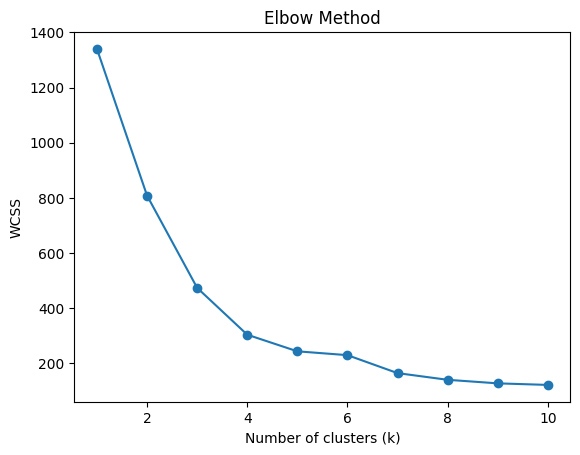

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=9)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_
df['cluster'].unique()

E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 2, 3, 1])

<Figure size 1500x2000 with 0 Axes>

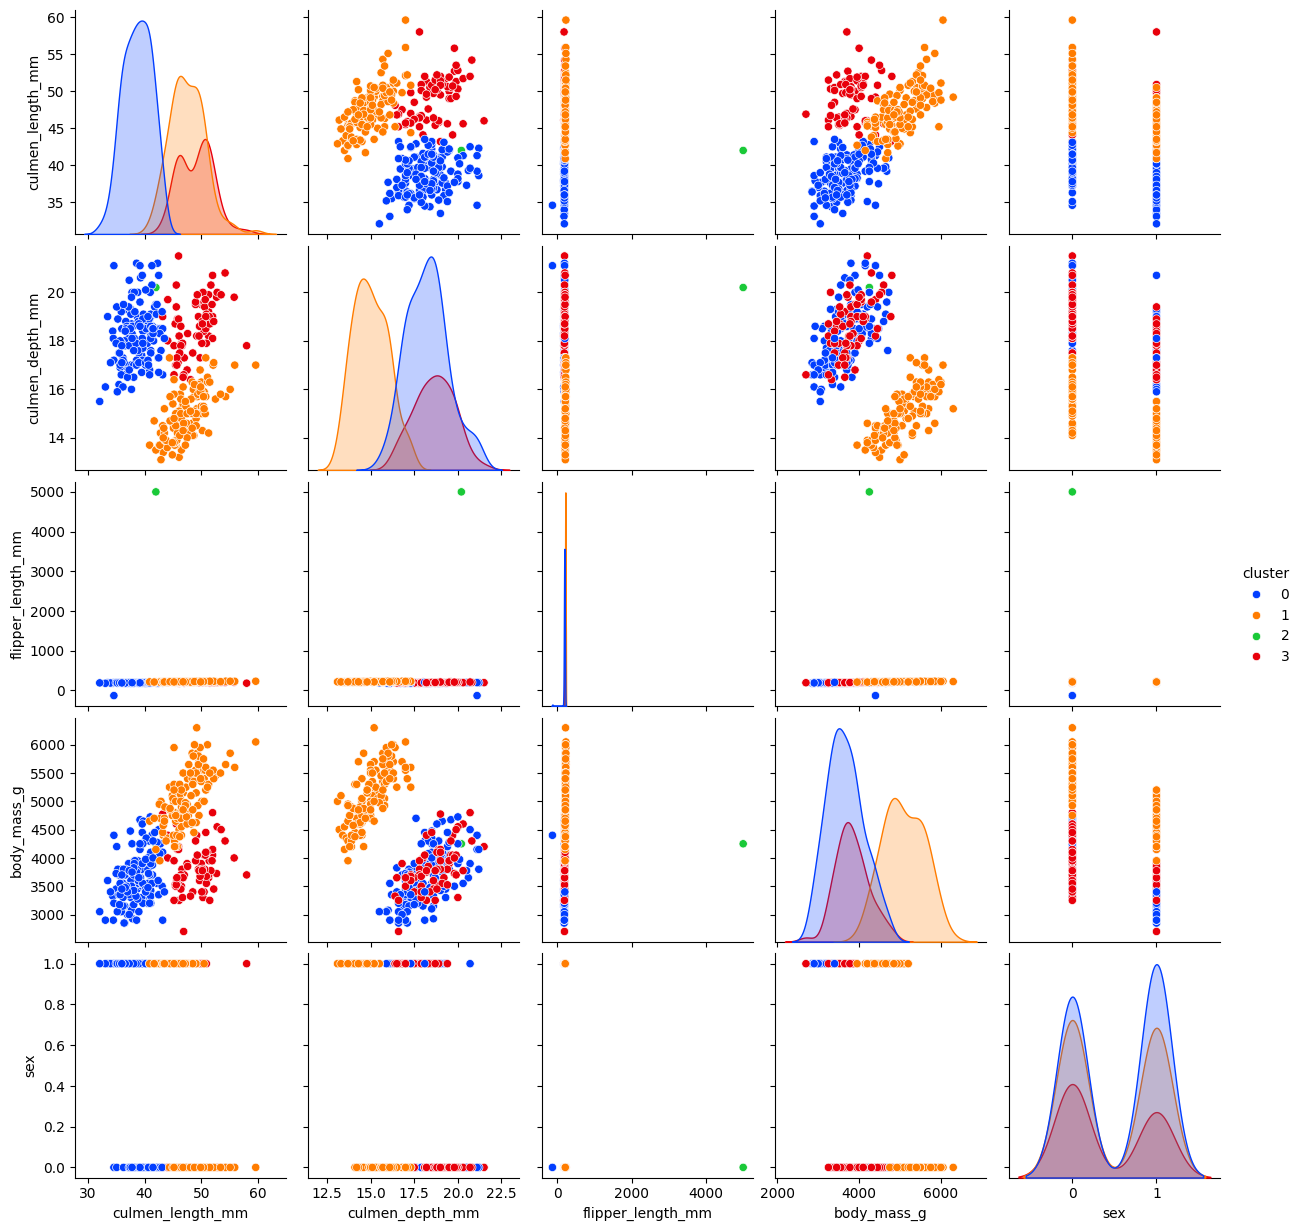

In [8]:
plt.figure(figsize=(15,20))
sns.pairplot(df, hue='cluster', palette='bright')
plt.show()